In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import seaborn as sns
sns.set_style("white")
import os
sns.set(rc={'figure.figsize':(13,7)})

In [10]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [11]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# creo copia sin quantitys negativos
online_rt_copy = online_rt[online_rt["Quantity"] >=0]

In [14]:
 
paises = ["Germany","EIRE", "Netherlands"]
online_filter = online_rt_copy[online_rt_copy.Country.isin(paises)]

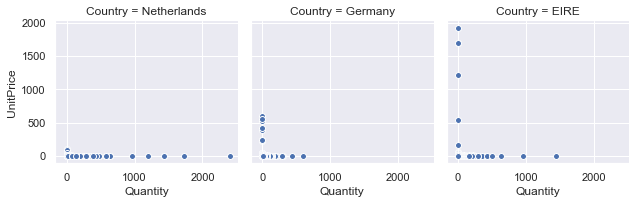

In [15]:
g = sns.FacetGrid(online_filter, col="Country")
g = g.map(plt.scatter, "Quantity", "UnitPrice", edgecolor="w")





In [16]:
filter2 = online_filter.groupby(["CustomerID","Country"])["Quantity","UnitPrice"].sum()
filter2.reset_index(level=1, inplace=True)

Text(0.5, 1.0, ' Quantity per UnitPrice for the top 3 Countries')

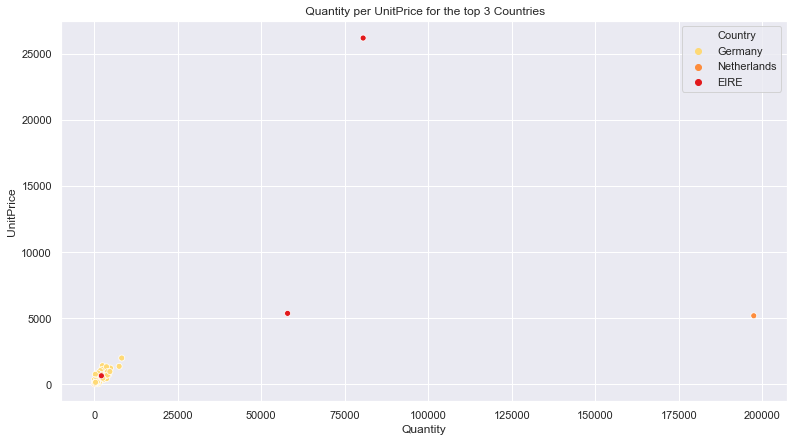

In [17]:
plt.figure(figsize=(13,7))
ax = sns.scatterplot(x="Quantity", y="UnitPrice", hue="Country", data=filter2, palette="YlOrRd")
plt.title(" Quantity per UnitPrice for the top 3 Countries")

In [18]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

In [19]:
del tips["Unnamed: 0"]

Text(0.5, 1.0, 'Total bill frecuency')

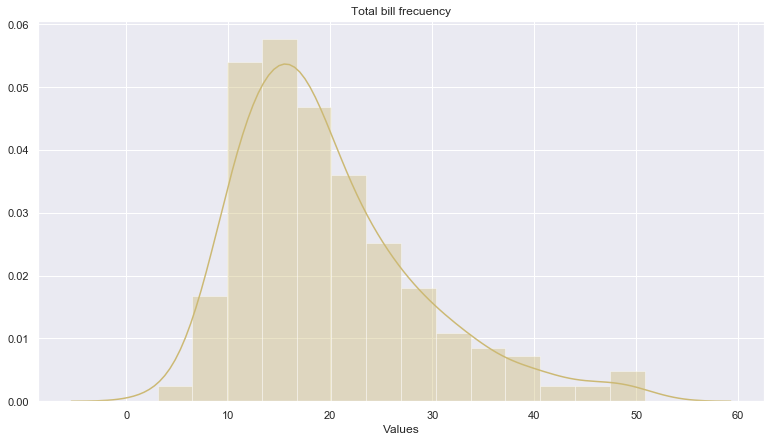

In [20]:
plt.figure(figsize=(13,7))
sns.distplot(tips.total_bill, color="y",axlabel="Values")
plt.title("Total bill frecuency")

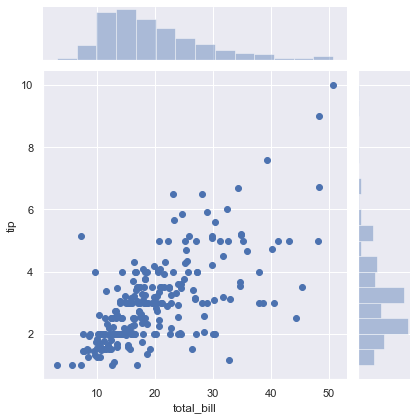

In [22]:
sns.jointplot(x="total_bill", y="tip", data=tips)

In [23]:
url = os.path.realpath("titanic.csv")

titanic = pd.read_csv(url)

titanic.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Text(0.5, 1.0, 'proporcion hombres mujeres')

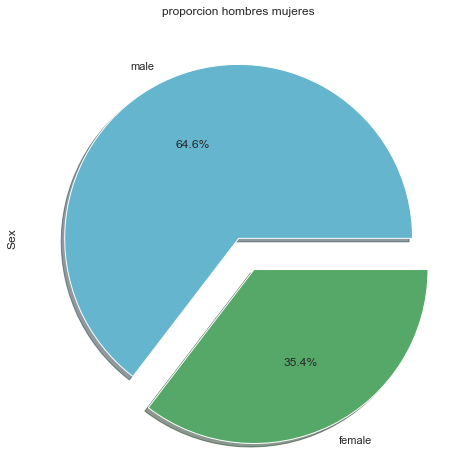

In [25]:
titanic["Sex"].value_counts().plot(kind='pie', figsize=(8, 8), shadow=True,explode=[0,0.2],autopct='%1.1f%%', colors=("c","g"))
plt.title("proporcion hombres mujeres", alpha=1)


Text(0.5, 1.0, ' Proporcion tarifas por edad y sexo')

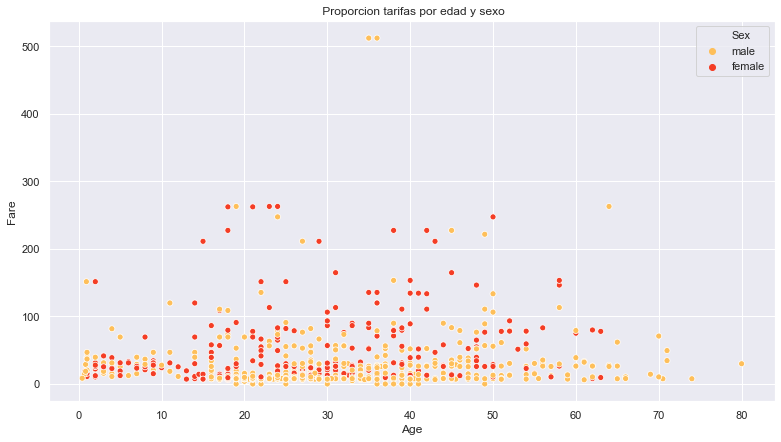

In [26]:
plt.figure(figsize=(13,7))
ax = sns.scatterplot(x="Age", y="Fare", hue="Sex", data=titanic, palette="YlOrRd")
plt.title(" Proporcion tarifas por edad y sexo")

Text(0.5, 1.0, 'Numero sobrevienetes')

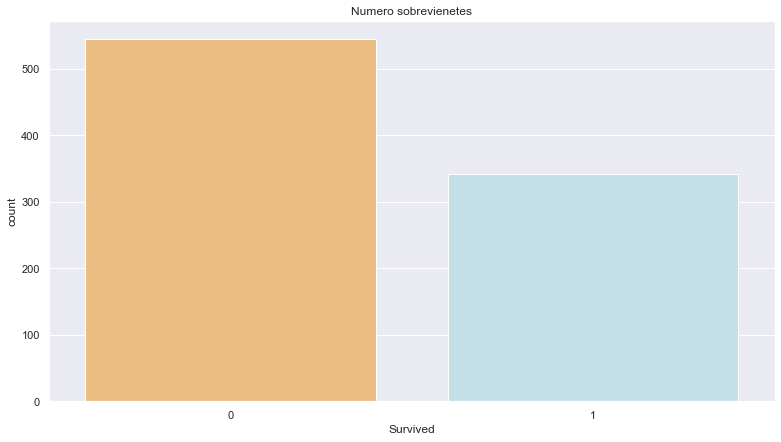

In [28]:
sns.countplot(x="Survived", data=titanic, palette="RdYlBu")
plt.title("Numero sobrevienetes")

Text(0.5, 1.0, 'Frecuencia tarifas ')

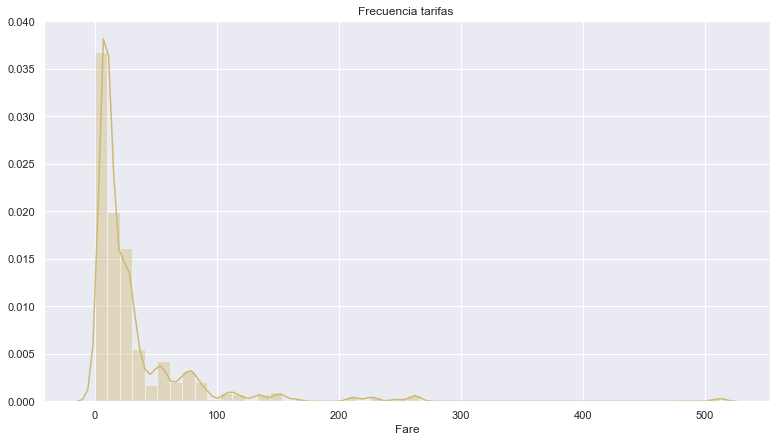

In [29]:
sns.distplot(titanic.Fare, color="y")
plt.title("Frecuencia tarifas ")

In [33]:
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.plot({
        "data": [Scatter(x=[1,2,3,4],y=[4,3,2,1])],
        "layout": Layout(title="hello world")
        })

'temp-plot.html'

### Ejercicio de regresion

In [3]:
udl = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Medical cost personal dataset\insurance.csv"
data_medical = pd.read_csv(udl)
data_medical.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
data_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


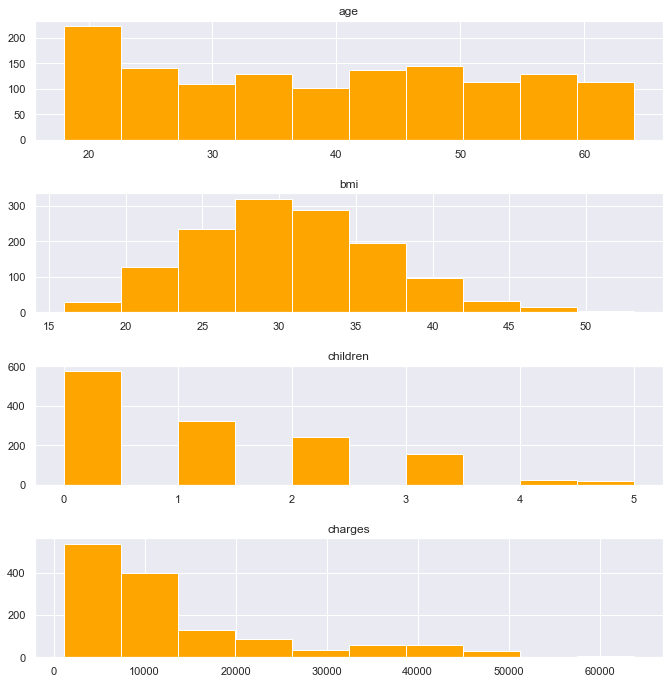

In [19]:
columns = ["age","bmi","children","charges"]
fig, axs = plt.subplots(4,figsize=(10,10))
fig. tight_layout(pad=3.0)
for i,e in enumerate(columns):
    axs[i].hist(data_medical[e], color="orange")
    axs[i].set_title(e)
    

    

In [21]:
data_medical["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [22]:
data_medical.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [43]:
# dummies
columns_names = data_medical.columns.values.tolist()
data_medical_new = data_medical[columns_names]
columns_dummies=["sex","smoker","region","children"]
for i in columns_dummies:    
    data_medical_new = data_medical_new.join(pd.get_dummies(data_medical_new[i], prefix=i,drop_first=True))


In [44]:
data_medical_new.head()

age     sex     bmi  children smoker     region      charges  sex_male  \
0   19  female  27.900         0    yes  southwest  16884.92400         0   
1   18    male  33.770         1     no  southeast   1725.55230         1   
2   28    male  33.000         3     no  southeast   4449.46200         1   
3   33    male  22.705         0     no  northwest  21984.47061         1   
4   32    male  28.880         0     no  northwest   3866.85520         1   

   smoker_yes  region_northwest  region_southeast  region_southwest  \
0           1                 0                 0                 1   
1           0                 0                 1                 0   
2           0                 0                 1                 0   
3           0                 1                 0                 0   
4           0                 1                 0                 0   

   children_1  children_2  children_3  children_4  children_5  
0           0           0           0           0           0  
1           1           0           0           0           0  
2           0           0           1           0           0  
3           0           0           0           0           0  
4           0           0           0           0           0

In [45]:
# quitamos las columnnas categoricas
data_medical_linear = data_medical_new.drop(columns=columns_dummies,axis=1)
data_medical_linear.head(5)

age     bmi      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900  16884.92400         0           1                 0   
1   18  33.770   1725.55230         1           0                 0   
2   28  33.000   4449.46200         1           0                 0   
3   33  22.705  21984.47061         1           0                 1   
4   32  28.880   3866.85520         1           0                 1   

   region_southeast  region_southwest  children_1  children_2  children_3  \
0                 0                 1           0           0           0   
1                 1                 0           1           0           0   
2                 1                 0           0           0           1   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   children_4  children_5  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0

In [46]:
# ver coorelacion entre publicidad y ventas
data_medical_linear.corr().abs().style.background_gradient(cmap='Oranges')

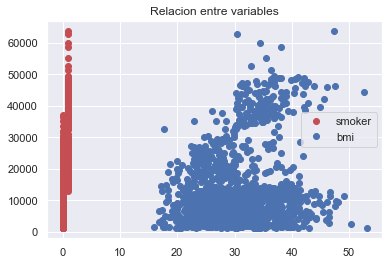

In [47]:
# graficamos la relacoin entre variables, sobre todo smoker

plt.plot(data_medical_linear["smoker_yes"],data_medical_linear["charges"],"ro", label="smoker")
plt.plot(data_medical_linear["bmi"],data_medical_linear["charges"],"bo",label="bmi")
plt.title("Relacion entre variables")
plt.legend()

In [33]:
data_medical_linear.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

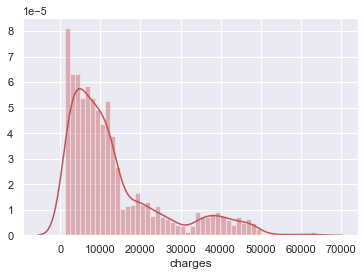

In [65]:
#"distribucion gastos seguros"
sns.distplot(data_medical_linear["charges"],bins=50, color="r")
plt.show()

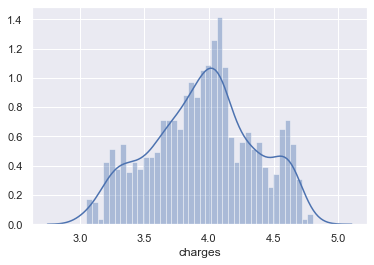

In [66]:
#"distribucion logaritmica gastos seguros"
sns.distplot(np.log10(data_medical_linear["charges"]),bins=40, color="b")

In [67]:
# transformacion logaritmica de Y (aqui hacemos una transformacion logaritimica de y para mejores resultados), ya que asi tiene una distribucion normal. Ojo cuando queramos usar el model tenermos que revertirlo ¡¡¡
data_medical_linear["charges"] = np.log(data_medical_linear["charges"])

In [68]:
# regresion con statmodel y sklearn

X = data_medical_linear.drop("charges",axis=1)
Y = data_medical_linear["charges"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

Ojo hay dos formas de regresion con satmodel (regressor_OLS  = smf.ols(formula='Y_variable ~ X_variable', data=df).fit()) como usa en Udemy, para no tener que preocuparse de añadir interceptor ( es mas coñazo porque hay que sumar las columnas + + +, pero no da problemas despues con el shape de las variables , ya que añade una columna de unos )
la otra como la hacemos abajo, tenemos que usar sm.add_constant tanto para x_train como x_test (abajo podemos verlo)

In [124]:
import statsmodels.api as sm
Xs = sm.add_constant(X_train)# tenemos que añadir el interceptor manualmente (ordenada origen)
model = sm.OLS(Y_train, Xs).fit()
#predictions = model.predict(X_train) 


In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     287.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          1.63e-322
Time:                        21:16:57   Log-Likelihood:                -653.25
No. Observations:                1070   AIC:                             1332.
Df Residuals:                    1057   BIC:                             1397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9645      0.083     84.338      0.000       6.803       7.127
age                  0.0348      0.001     35.249      0.000       0.033       0.037
bmi                  0.0140      0.002      5.952      0.000       0.009       0.019
sex_male            -0.0515      0.027     -1.871      0.062      -0.105       0.002
smoker_yes           1.5620      0.034     45.500      0.000       1.495       1.629
region_northwest    -0.0553      0.040     -1.382      0.167      -0.134       0.023
region_southeast    -0.1473      0.040     -3.682      0.000      -0.226      -0.069
region_southwest    -0.1166      0.040     -2.949      0.003      -0.194      -0.039
children_1           0.1660      0.035      4.770      0.000       0.098       0.234
children_2           0.2871      0.039      7.435      0.000       0.211       0.363
children_3           0.2249      0.046      4.839      0.000       0.134       0.316
children_4           0.5142      0.105      4.894      0.000       0.308       0.720
children_5           0.3998      0.111      3.596      0.000       0.182       0.618
==============================================================================
Omnibus:                      375.614   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1351.422
Skew:                           1.687   Prob(JB):                    3.49e-294
Kurtosis:                       7.350   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# vemos una distribucion  normal de los residuos por lo que es un buen indicador de que las cosas estan en buen camino ;)

Text(0.5, 1.0, 'Distribucion de los residuos del Modelo')

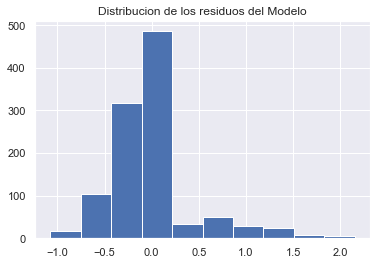

In [144]:
plt.hist(Y_train-model.predict(Xs))
plt.title("Distribucion de los residuos del Modelo")

Text(0.5, 1.0, 'relacion entre valor real y predic')

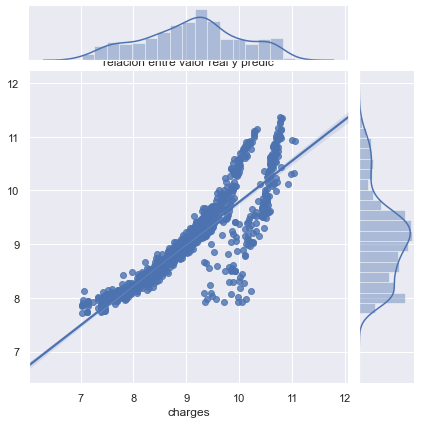

In [145]:
# vemos si hay una relacion lineal con scatter entre valor real y pred
sns.jointplot(Y_train,model.predict(Xs), kind="reg")
plt.title("relacion entre valor real y predic")

In [ ]:
# ojo vemos que la linea no ajusta bien, quizas una polinomial u otro algoritmo

In [164]:
ys = sm.add_constant(X_test)
model.predict(ys)

578      9.191850
610      9.027127
569     10.941895
1034     9.514155
198      8.934175
          ...    
1084     9.777445
726      8.845637
1132     9.456926
725     10.192179
963      9.083244
Length: 268, dtype: float64

Text(0.5, 1.0, 'relacion entre valor real y predic con el test')

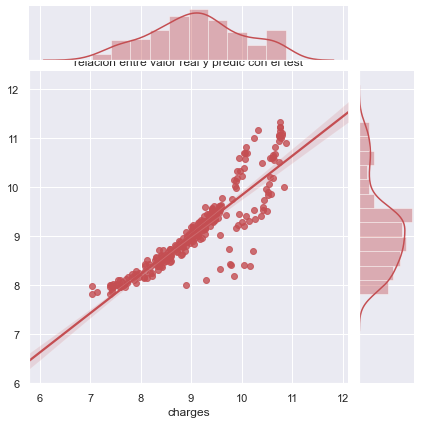

In [165]:
sns.jointplot(Y_test,model.predict(ys), kind="reg",color="r")
plt.title("relacion entre valor real y predic con el test")

In [146]:
#VIF = 1/(1-R2 ajdusted) nos indica si hay multicolinearildad entre los parametros, 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [147]:
calc_vif(Xs)

variables        VIF
0              const  36.307815
1                age   1.026898
2                bmi   1.119889
3           sex_male   1.006331
4         smoker_yes   1.021475
5   region_northwest   1.544482
6   region_southeast   1.698672
7   region_southwest   1.580391
8         children_1   1.179963
9         children_2   1.164349
10        children_3   1.128338
11        children_4   1.025107
12        children_5   1.028757

In [149]:
real = Y_train
pred = model.predict(Xs)
frame = {"real":real,"pred":pred}
df_predicciones = pd.DataFrame(data=frame)

### valores reales versus predicciones (ojo tenemos que quitar el np.log de los resultados ¡¡)

In [150]:
df_predicciones 

real       pred
621   10.601181  10.635061
194    7.036562   7.872132
240   10.558716  10.125188
1168   8.449051   8.687493
1192   9.474177   9.599092
...         ...        ...
763    8.029696   8.215079
835    8.876311   9.015104
1216   8.597050   8.506418
559    7.406364   8.014280
684    8.469267   8.419466

[1070 rows x 2 columns]

### usamos ahora sklearn ¡¡¡

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

x_trainsk,x_testsk,y_trainsk,y_testsk = train_test_split(X,Y,random_state=0)
lm = LinearRegression().fit(x_trainsk,y_trainsk)

lm.score(x_testsk,y_testsk)

0.7839800091227543

Text(0.5, 1.0, 'relacion entre valor real y predic')

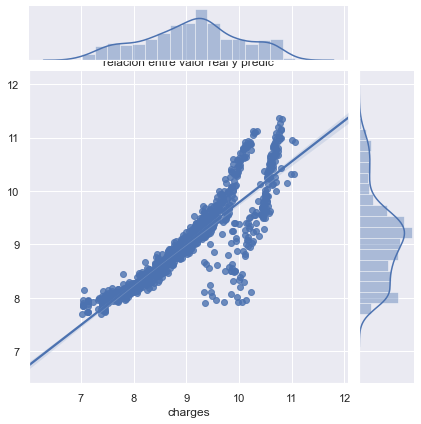

In [154]:
sns.jointplot(y_trainsk,lm.predict(x_trainsk), kind="reg")
plt.title("relacion entre valor real y predic")

In [155]:
columns_data = X.columns.values.tolist()
columns_data

['age',
 'bmi',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'children_1',
 'children_2',
 'children_3',
 'children_4',
 'children_5']

In [156]:
regressor_OLS  = smf.ols(formula='charges ~ columns_data', data=data_medical_linear).fit()

PatsyError: Number of rows mismatch between data argument and columns_data (1338 versus 12)
    charges ~ columns_data
              ^^^^^^^^^^^^